In [1]:
import requests
import json
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Make a get request to get the latest player data from the FPL API
url = "https://fantasy.premierleague.com/api/bootstrap-static/"
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [4]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [5]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,NaN,84450,0,0,-1,1,1,3,2.7,...,233,132,160,67,91,40,114,38,1.06,0.43
1,0.0,0.0,153256,0,0,-4,4,1,3,0.0,...,624,321,498,182,417,184,235,72,0.81,0.00
2,NaN,NaN,156074,0,0,-3,3,0,2,0.7,...,594,169,345,119,449,165,434,162,0.00,0.00
3,100.0,100.0,167199,0,0,-3,3,0,3,2.7,...,315,191,156,64,131,54,272,88,1.02,0.48
4,100.0,100.0,184029,0,0,5,-5,4,3,4.7,...,40,20,47,18,11,4,6,3,1.06,0.42


In [6]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [7]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Xhaka,1,3,2.6,49,2113,845792,19.2,94
1,Elneny,1,3,0.6,41,111,198337,1.5,6
2,Holding,1,2,0.1,42,17,7171,1.7,7
3,Partey,1,3,0.4,47,1681,101282,14.3,67
4,Ødegaard,1,3,37.3,70,2131,5467369,20.6,144


In [8]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\RoboDK\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Xhaka,1,3,2.6,49,2113,845792,19.2,94,Midfielder
1,Elneny,1,3,0.6,41,111,198337,1.5,6,Midfielder
2,Holding,1,2,0.1,42,17,7171,1.7,7,Defender
3,Partey,1,3,0.4,47,1681,101282,14.3,67,Midfielder
4,Ødegaard,1,3,37.3,70,2131,5467369,20.6,144,Midfielder


In [10]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\RoboDK\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


NameError: name 'first_name' is not defined

In [12]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Xhaka,Arsenal,3,2.6,49,2113,845792,19.2,94,Midfielder
1,Elneny,Arsenal,3,0.6,41,111,198337,1.5,6,Midfielder
2,Holding,Arsenal,2,0.1,42,17,7171,1.7,7,Defender
3,Partey,Arsenal,3,0.4,47,1681,101282,14.3,67,Midfielder
4,Ødegaard,Arsenal,3,37.3,70,2131,5467369,20.6,144,Midfielder


In [13]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\RoboDK\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
530,Trippier,Newcastle,2,64.2,60,2107,6720112,24.5,147,Defender,24.5
542,Almirón Rejala,Newcastle,3,22.7,54,1955,5726290,23.5,127,Midfielder,23.5
7,White,Arsenal,2,11.9,47,1993,2169029,23.4,110,Defender,23.4
117,Raya Martin,Brentford,1,13.9,48,2160,2007799,22.7,109,Goalkeeper,22.7
304,Leno,Fulham,1,3.4,45,2160,486827,22.4,101,Goalkeeper,22.4
328,Hoelgebaum Pereira,Fulham,3,15.9,44,2169,3018634,22.3,98,Midfielder,22.3
349,Ward,Leicester,1,25.6,40,2250,2312609,22.2,89,Goalkeeper,22.2
15,Martinelli Silva,Arsenal,3,36.3,65,2095,6200418,21.8,142,Midfielder,21.8
425,Ramses Becker,Liverpool,1,15.6,54,2250,1614757,21.7,117,Goalkeeper,21.7
712,Malheiro de Sá,Wolves,1,5.5,50,2340,931047,21.6,108,Goalkeeper,21.6


In [15]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,5.690157
1,Forward,4.515217
2,Goalkeeper,5.086076
3,Midfielder,5.322981


In [16]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [17]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [18]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,12.961290
0,Defender,7.941209
3,Midfielder,6.939271
1,Forward,6.108824


In [19]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [20]:
team_pivot.sort_values('value',ascending=False)

,team,value
0,Arsenal,11.713043
14,Newcastle,9.916667
12,Man City,9.127273
3,Brentford,8.772000
4,Brighton,8.475000
1,Aston Villa,8.286957
13,Man Utd,8.015385
8,Fulham,7.824138
6,Crystal Palace,7.687500
17,Spurs,7.585185


In [21]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
117,Raya Martin,Brentford,1,13.9,48,2160,2007799,22.7,109,Goalkeeper,22.7
304,Leno,Fulham,1,3.4,45,2160,486827,22.4,101,Goalkeeper,22.4
349,Ward,Leicester,1,25.6,40,2250,2312609,22.2,89,Goalkeeper,22.2
425,Ramses Becker,Liverpool,1,15.6,54,2250,1614757,21.7,117,Goalkeeper,21.7
712,Malheiro de Sá,Wolves,1,5.5,50,2340,931047,21.6,108,Goalkeeper,21.6
229,Guaita,Crystal Palace,1,2.1,44,2250,508421,21.4,94,Goalkeeper,21.4
12,Ramsdale,Arsenal,1,12.1,49,2340,1469716,21.0,103,Goalkeeper,21.0
549,Pope,Newcastle,1,20.9,54,2091,3702552,19.6,106,Goalkeeper,19.6
487,De Gea Quintana,Man Utd,1,10.3,50,2250,1350561,19.2,96,Goalkeeper,19.2
193,Arrizabalaga,Chelsea,1,8.8,47,1485,1677922,17.9,84,Goalkeeper,17.9


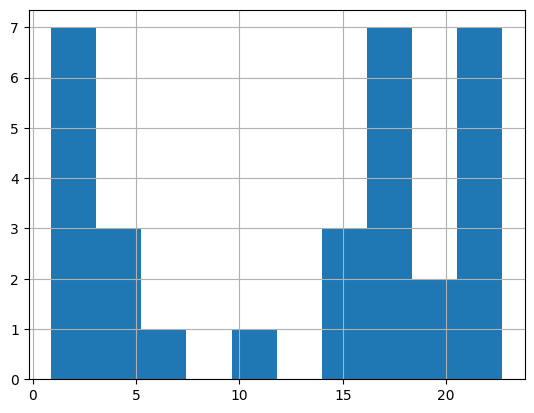

In [22]:
goal_df.value.hist() #Goalkeepers
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
530,Trippier,Newcastle,2,64.2,60,2107,6720112,24.5,147,Defender,24.5
7,White,Arsenal,2,11.9,47,1993,2169029,23.4,110,Defender,23.4
13,dos Santos Magalhães,Arsenal,2,14.0,52,2340,2211722,20.8,108,Defender,20.8
21,Saliba,Arsenal,2,33.6,53,2325,5388498,20.8,110,Defender,20.8
531,Burn,Newcastle,2,3.5,45,2030,679449,20.4,92,Defender,20.4
539,Schär,Newcastle,2,13.6,51,1964,3163392,20.0,102,Defender,20.0
550,Botman,Newcastle,2,5.4,45,1867,1086080,20.0,90,Defender,20.0
307,Ream,Fulham,2,3.3,46,2337,552051,18.9,87,Defender,18.9
140,Mee,Brentford,2,17.1,51,2018,2846881,18.8,96,Defender,18.8
353,Castagne,Leicester,2,6.2,44,2085,1843253,18.2,80,Defender,18.2


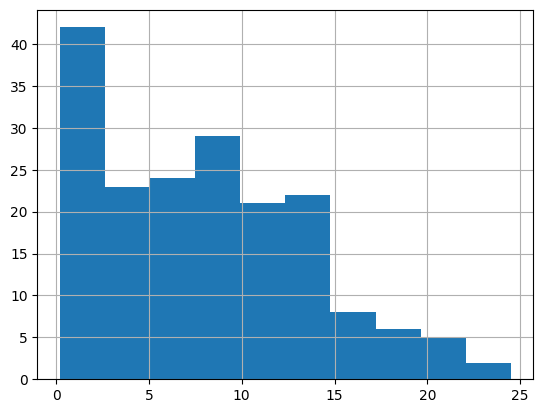

In [23]:
def_df.value.hist() # Defenders
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
542,Almirón Rejala,Newcastle,3,22.7,54,1955,5726290,23.5,127,Midfielder,23.5
328,Hoelgebaum Pereira,Fulham,3,15.9,44,2169,3018634,22.3,98,Midfielder,22.3
15,Martinelli Silva,Arsenal,3,36.3,65,2095,6200418,21.8,142,Midfielder,21.8
155,March,Brighton,3,8.1,51,1975,1581985,21.2,108,Midfielder,21.2
495,Rashford,Man Utd,3,54.1,73,2038,8128567,21.0,153,Midfielder,21.0
4,Ødegaard,Arsenal,3,37.3,70,2131,5467369,20.6,144,Midfielder,20.6
0,Xhaka,Arsenal,3,2.6,49,2113,845792,19.2,94,Midfielder,19.2
153,Groß,Brighton,3,9.5,54,2002,4104270,19.1,103,Midfielder,19.1
124,Jensen,Brentford,3,1.6,48,1855,668094,19.0,91,Midfielder,19.0
49,Bailey,Aston Villa,3,3.5,44,1479,1033767,17.7,78,Midfielder,17.7


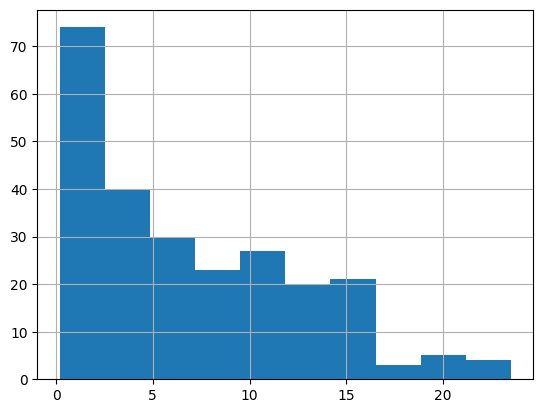

In [24]:
mid_df.value.hist() # Midfielders
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
116,Toney,Brentford,4,34.1,77,1971,9250888,16.9,130,Forward,16.9
471,Haaland,Man City,4,84.7,122,2021,5638711,16.1,197,Forward,16.1
576,Johnson,Nott'm Forest,4,2.4,57,2060,493205,16.0,91,Forward,16.0
131,Mbeumo,Brentford,4,4.5,58,1837,1116503,14.5,84,Forward,14.5
44,Watkins,Aston Villa,4,8.9,73,1969,1591960,14.0,102,Forward,14.0
646,Kane,Spurs,4,37.9,117,2326,5751132,13.9,163,Forward,13.9
81,Solanke,Bournemouth,4,1.8,55,1705,1471090,13.8,76,Forward,13.8
316,Mitrović,Fulham,4,17.8,67,1726,7659424,13.1,88,Forward,13.1
617,Adams,Southampton,4,1.1,61,1636,514160,12.6,77,Forward,12.6
679,Ings,West Ham,4,1.8,64,1054,444714,11.9,76,Forward,11.9


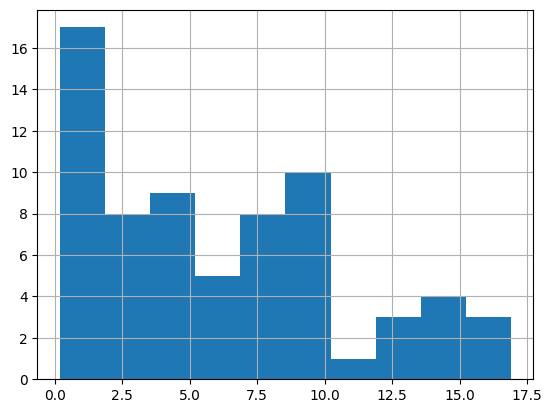

In [25]:
fwd_df.value.hist() # Forwards
fwd_df.sort_values('value',ascending=False).head(10)

In [26]:
slim_elements_df.to_csv('~/Desktop/fpl_data.csv') # Export data in CSV for manipulation / analysis